In [7]:
!pip install prophet

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from prophet import Prophet
import random
warnings.filterwarnings("ignore")

#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')


In [83]:
mathura_road=pd.read_csv("Raw_data_1Hr_2023_site_103_CRRI_Mathura_Road_Delhi_IMD_1Hr.csv")

In [10]:
mathura_road.head(5)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,129.0275,NaN,NaN,1.6800,18.2325,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,129.5000,NaN,NaN,1.5750,18.0725,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,128.6900,NaN,NaN,1.2675,17.8175,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,127.7125,NaN,NaN,0.9550,17.6375,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,127.5800,NaN,NaN,0.8275,17.7575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [11]:
mathura_road.tail(10)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
8750,2023-12-31 14:00:00,174.3625,265.9600,44.5800,20.5425,65.1375,NaN,NaN,0.8500,33.4150,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8751,2023-12-31 15:00:00,169.2825,263.6075,41.1325,19.8325,60.9850,NaN,NaN,0.8300,33.6050,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8752,2023-12-31 16:00:00,173.2825,262.7250,35.3675,18.5825,53.9525,NaN,NaN,0.8275,33.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8753,2023-12-31 17:00:00,191.4250,272.6500,35.8475,18.6650,54.5150,NaN,NaN,0.8625,33.9075,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8754,2023-12-31 18:00:00,185.5575,262.2150,36.7925,18.8025,55.5975,NaN,NaN,0.9050,34.5250,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8755,2023-12-31 19:00:00,191.0675,259.9325,37.4100,19.0250,56.4325,NaN,NaN,0.9275,36.1800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8756,2023-12-31 20:00:00,167.4375,268.4025,37.3400,19.0325,56.3700,NaN,NaN,0.9125,34.6200,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8757,2023-12-31 21:00:00,146.1150,216.0600,37.7750,19.0950,56.8625,NaN,NaN,0.8800,34.3800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8758,2023-12-31 22:00:00,138.2550,166.4150,38.1725,19.1325,57.3050,NaN,NaN,0.8550,33.9500,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8759,2023-12-31 23:00:00,136.8225,163.1475,38.5375,19.1600,57.7000,NaN,NaN,0.8400,33.5575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [12]:
8759-744 #we need only november to november (31*24)

8015

In [13]:
mathura_road=mathura_road[0:8015]
mathura_road.tail(10)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
8005,2023-11-30 13:00:00,194.9475,244.1475,26.2275,17.6200,43.8500,NaN,NaN,0.7675,44.7925,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8006,2023-11-30 14:00:00,186.5900,224.4075,26.9575,17.8425,44.8000,NaN,NaN,0.6950,47.9175,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8007,2023-11-30 15:00:00,153.0700,237.7575,26.6625,17.6750,44.3375,NaN,NaN,0.6125,57.7275,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8008,2023-11-30 16:00:00,149.6200,215.8200,26.2400,17.6050,43.8475,NaN,NaN,0.5950,48.0975,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8009,2023-11-30 17:00:00,148.5050,212.7175,26.2300,17.5200,43.7500,NaN,NaN,0.6850,19.8675,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8010,2023-11-30 18:00:00,160.5300,252.7800,27.9425,17.8975,45.8425,NaN,NaN,0.9725,14.2175,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8011,2023-11-30 19:00:00,183.5800,321.7425,27.5525,17.9775,45.5325,NaN,NaN,0.9800,15.8225,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8012,2023-11-30 20:00:00,197.3200,275.4175,27.1600,17.6975,44.8600,NaN,NaN,1.1400,15.4300,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8013,2023-11-30 21:00:00,190.0525,275.3050,28.0550,17.9775,46.0200,NaN,NaN,1.1100,14.6800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8014,2023-11-30 22:00:00,185.0125,270.6775,46.7950,21.5675,68.3575,NaN,NaN,1.3450,15.8900,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [14]:
mathura_road.iloc[:,1:3]

,PM2.5 (µg/m³),PM10 (µg/m³)
0,320.030000,229.3475
1,205.282500,293.7725
2,169.927500,253.5325
3,67.213333,225.8825
4,151.030000,181.4200
...,...,...
8010,160.530000,252.7800
8011,183.580000,321.7425
8012,197.320000,275.4175
8013,190.052500,275.3050


In [15]:
mathura_road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            8015 non-null   object 
 1   PM2.5 (µg/m³)        7414 non-null   float64
 2   PM10 (µg/m³)         7276 non-null   float64
 3   NO (µg/m³)           6987 non-null   float64
 4   NO2 (µg/m³)          7348 non-null   float64
 5   NOx (ppb)            7358 non-null   float64
 6   NH3 (µg/m³)          0 non-null      float64
 7   SO2 (µg/m³)          0 non-null      float64
 8   CO (mg/m³)           7197 non-null   float64
 9   Ozone (µg/m³)        7426 non-null   float64
 10  Benzene (µg/m³)      0 non-null      float64
 11  Toluene (µg/m³)      0 non-null      float64
 12  Xylene (µg/m³)       0 non-null      float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  0 non-null      float64
 15  MP-Xylene (µg/m³)    0 non-null      f

In [16]:
mathura_road.drop(columns=["NO (µg/m³)", 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)','Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],inplace=True)

In [17]:
mathura_road.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
       'CO (mg/m³)', 'Ozone (µg/m³)'],
      dtype='object')

In [18]:
mathura_road

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-01-01 00:00:00,320.030000,229.3475,26.5150,1.6800,18.2325
1,2023-01-01 01:00:00,205.282500,293.7725,26.5125,1.5750,18.0725
2,2023-01-01 02:00:00,169.927500,253.5325,26.5175,1.2675,17.8175
3,2023-01-01 03:00:00,67.213333,225.8825,26.5700,0.9550,17.6375
4,2023-01-01 04:00:00,151.030000,181.4200,26.5950,0.8275,17.7575
...,...,...,...,...,...,...
8010,2023-11-30 18:00:00,160.530000,252.7800,17.8975,0.9725,14.2175
8011,2023-11-30 19:00:00,183.580000,321.7425,17.9775,0.9800,15.8225
8012,2023-11-30 20:00:00,197.320000,275.4175,17.6975,1.1400,15.4300
8013,2023-11-30 21:00:00,190.052500,275.3050,17.9775,1.1100,14.6800


In [19]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)    601
PM10 (µg/m³)     739
NO2 (µg/m³)      667
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

<Axes: >

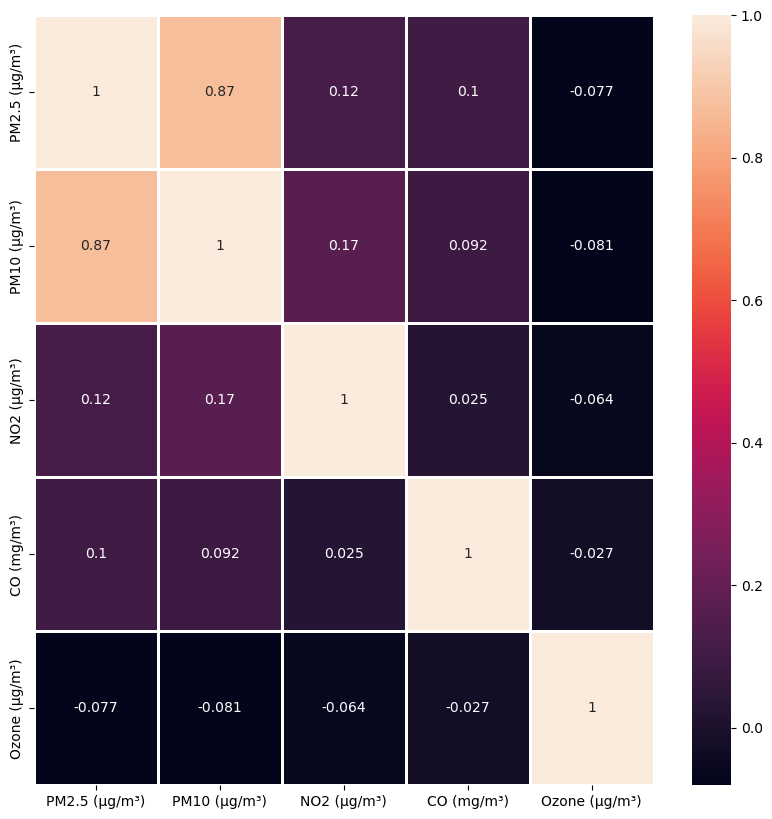

In [20]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.round(mathura_road.corr(),3),annot=True,linewidths=.9)

array([[<Axes: title={'center': 'PM2.5 (µg/m³)'}>,
        <Axes: title={'center': 'PM10 (µg/m³)'}>],
       [<Axes: title={'center': 'NO2 (µg/m³)'}>,
        <Axes: title={'center': 'CO (mg/m³)'}>],
       [<Axes: title={'center': 'Ozone (µg/m³)'}>, <Axes: >]],
      dtype=object)

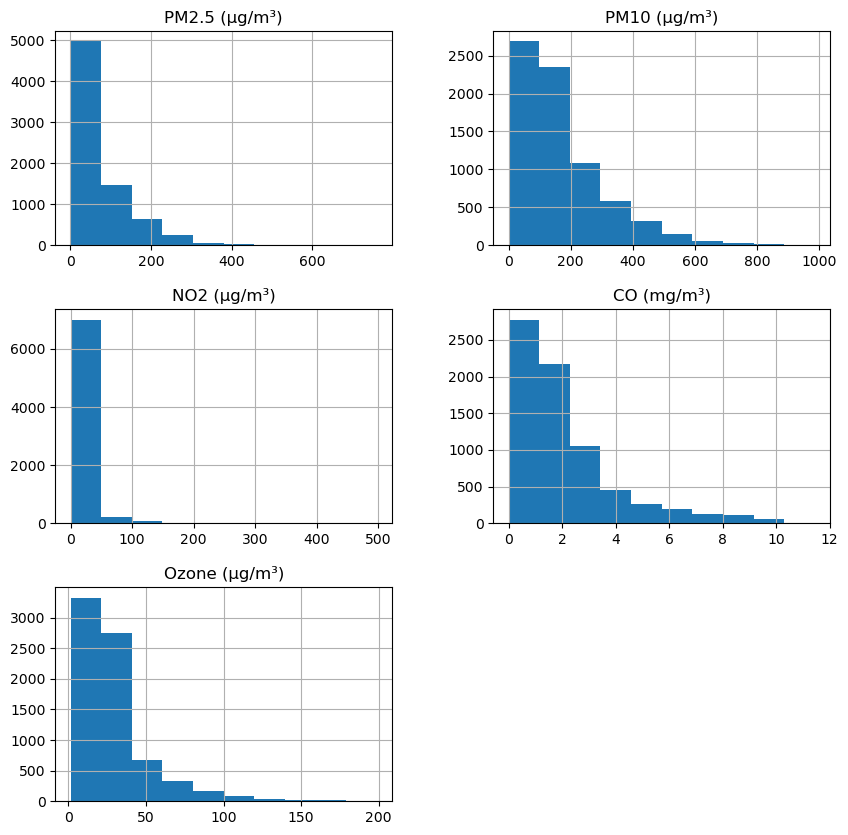

In [21]:
mathura_road.hist(bins=10,figsize=(10,10))

In [22]:
mathura_road["PM2.5 (µg/m³)"].max()

759.5799999999999

In [23]:
mathura_road["PM2.5 (µg/m³)"].value_counts()

45.6025     4
41.1200     3
41.7000     3
44.6125     3
21.1950     3
           ..
38.3650     1
43.3575     1
38.1825     1
30.2325     1
185.0125    1
Name: PM2.5 (µg/m³), Length: 6941, dtype: int64

In [24]:
mathura_road["PM2.5 (µg/m³)"].median()

49.287499999999994

In [25]:
mathura_road["PM2.5 (µg/m³)"].fillna(mathura_road["PM2.5 (µg/m³)"].median(),inplace=True)

In [26]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)     739
NO2 (µg/m³)      667
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

In [27]:
mathura_road["PM10 (µg/m³)"].value_counts()

85.7825     3
97.9100     3
46.7250     3
122.8150    3
112.2150    3
           ..
100.0425    1
131.3625    1
193.3275    1
163.3925    1
270.6775    1
Name: PM10 (µg/m³), Length: 7103, dtype: int64

In [28]:
mathura_road["PM10 (µg/m³)"].median()

128.6375

In [84]:
mathura_road["PM10 (µg/m³)"].fillna(mathura_road["PM10 (µg/m³)"].median(),inplace=True)

In [30]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)      667
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

In [31]:
mathura_road["NO2 (µg/m³)"].value_counts()

30.2000    27
23.2175     9
23.0325     8
0.0300      7
22.9350     7
           ..
4.4925      1
6.0400      1
8.2575      1
8.3700      1
17.6050     1
Name: NO2 (µg/m³), Length: 5163, dtype: int64

In [32]:
mathura_road["NO2 (µg/m³)"].median()

18.3525

In [85]:
mathura_road["NO2 (µg/m³)"].fillna(mathura_road["NO2 (µg/m³)"].median(),inplace=True)

In [34]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)        0
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

In [35]:
mathura_road["Ozone (µg/m³)"].value_counts()

21.7775    6
17.4075    6
13.7175    6
21.0600    6
17.5850    6
          ..
22.5850    1
24.7550    1
28.9875    1
34.0875    1
15.8900    1
Name: Ozone (µg/m³), Length: 5650, dtype: int64

In [86]:
mathura_road["Ozone (µg/m³)"].fillna(mathura_road["Ozone (µg/m³)"].median(),inplace=True)

In [37]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)        0
CO (mg/m³)       818
Ozone (µg/m³)      0
dtype: int64

In [38]:
mathura_road["CO (mg/m³)"].median()

1.53

In [87]:
mathura_road["CO (mg/m³)"].fillna(mathura_road["CO (mg/m³)"].median(),inplace=True)

In [40]:
mathura_road.isna().sum()

Timestamp        0
PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
NO2 (µg/m³)      0
CO (mg/m³)       0
Ozone (µg/m³)    0
dtype: int64

# AQI

In [99]:
mathura_road_2=mathura_road[["PM2.5 (µg/m³)","PM10 (µg/m³)","Ozone (µg/m³)","NO2 (µg/m³)","CO (mg/m³)"]]

In [51]:
from sklearn.preprocessing import QuantileTransformer
quntile=QuantileTransformer(n_quantiles=10,random_state=0)
quantile_data=quntile.fit_transform(mathura_road_2)

In [52]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

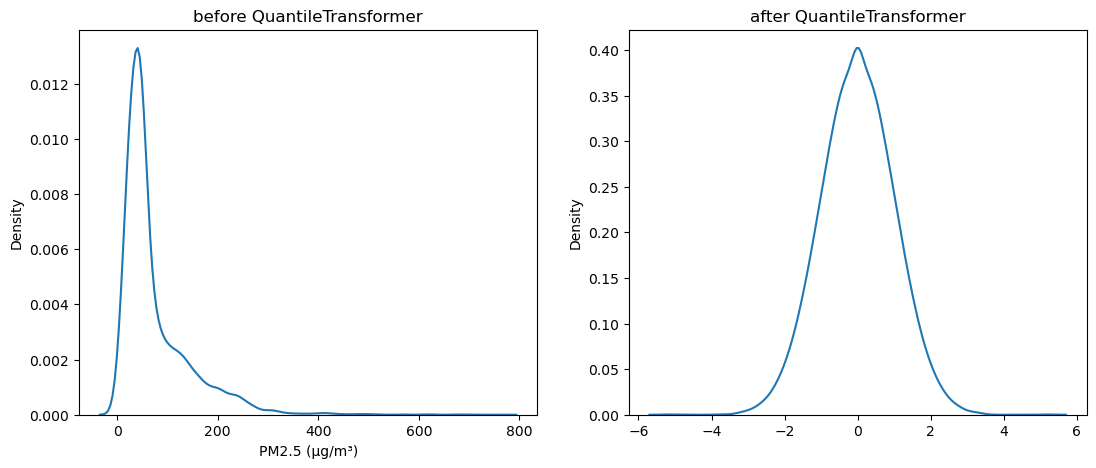

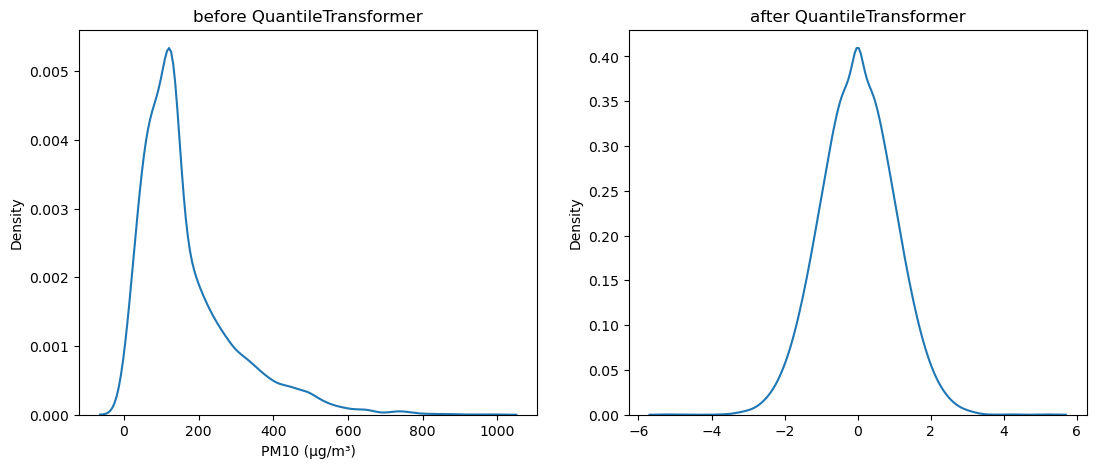

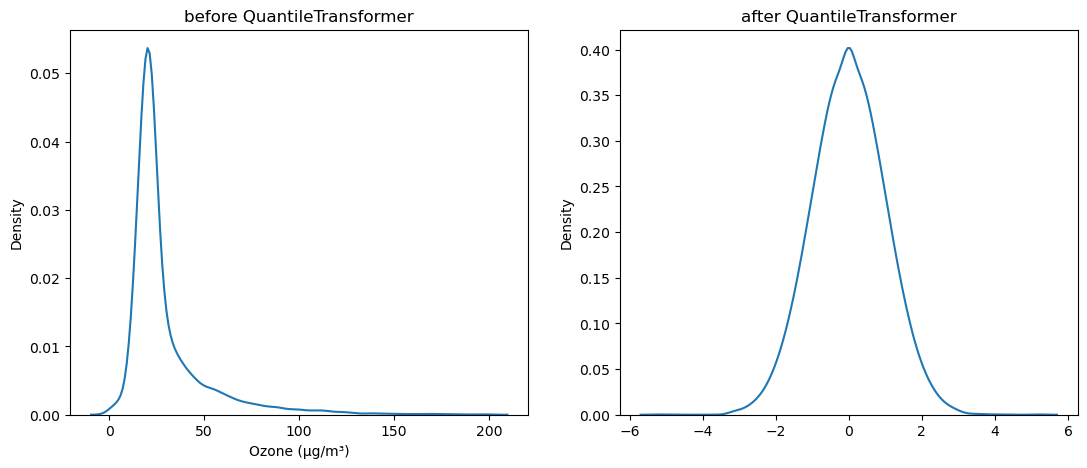

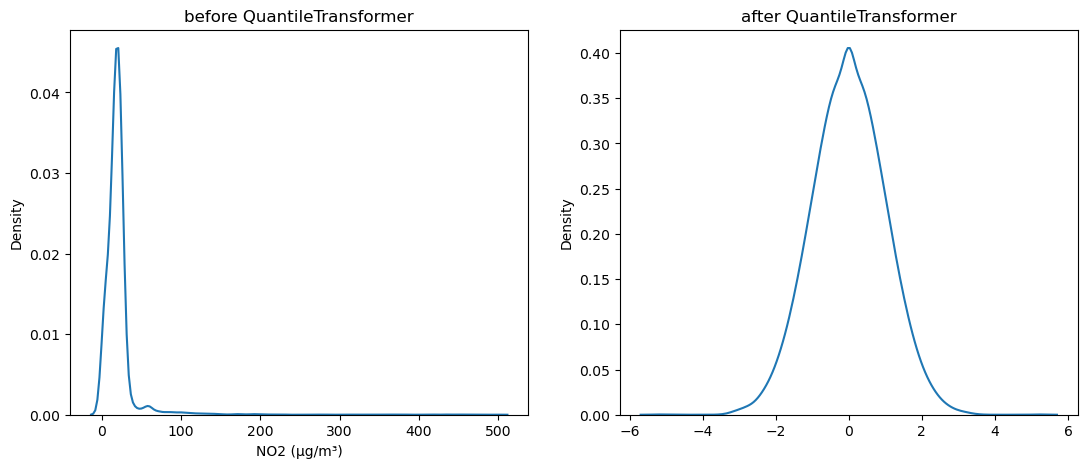

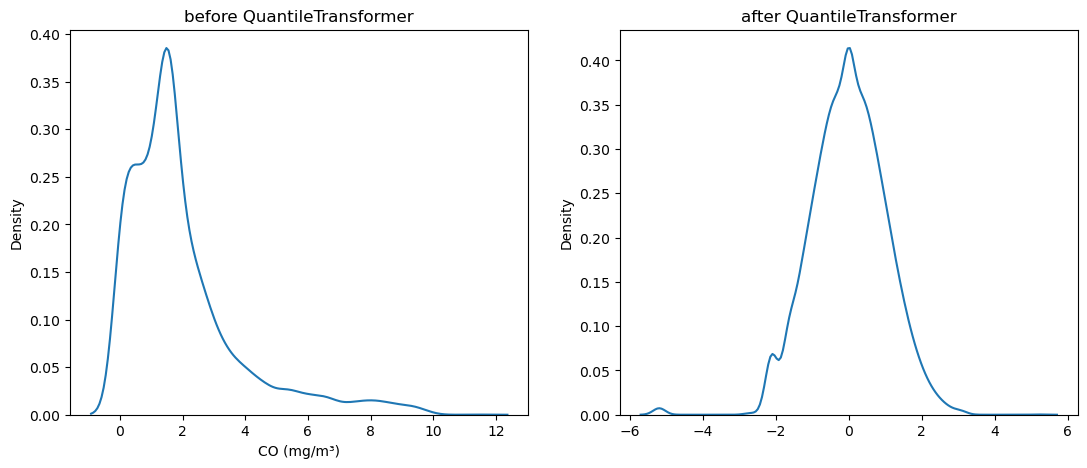

In [57]:
for col in mathura_road_2.columns:
    plots(mathura_road_2, col, QuantileTransformer(output_distribution='normal'))

<Axes: >

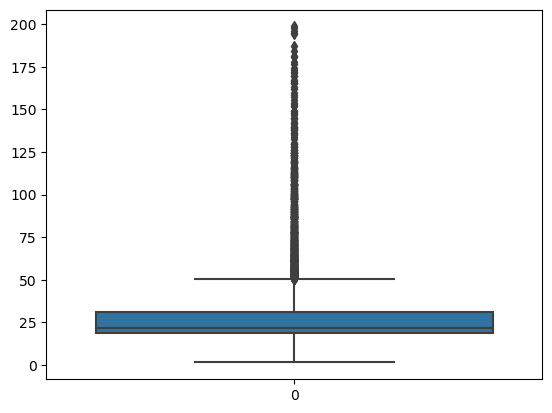

In [58]:
sns.boxplot(mathura_road_2["Ozone (µg/m³)"])

In [ ]:
sns.boxplot(df_new["PM2.5 (µg/m³)"])

In [ ]:
mathura_road.corr()

<h2>#for aqi</h2>

In [ ]:
mathura_road

In [61]:
mathura_road_2.isna().sum()

PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
Ozone (µg/m³)    0
NO2 (µg/m³)      0
CO (mg/m³)       0
dtype: int64

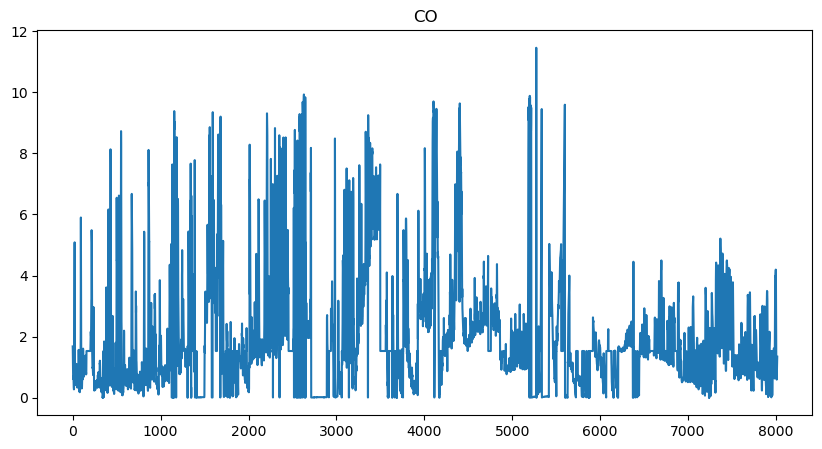

In [62]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
mathura_road_2['CO (mg/m³)'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='CO')
plt.show()     #on basis of count

In [150]:
mathura_road["Timestamp"]=pd.to_datetime(mathura_road['Timestamp']) #converting data type into date

In [64]:
mathura_road["Timestamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8015 entries, 0 to 8014
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
8015 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 62.7 KB


In [151]:
new= mathura_road["Timestamp"]

In [152]:
new=pd.DataFrame(new)

In [101]:
mathura_road_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5 (µg/m³)  8158 non-null   float64
 1   PM10 (µg/m³)   8760 non-null   float64
 2   Ozone (µg/m³)  8760 non-null   float64
 3   NO2 (µg/m³)    8760 non-null   float64
 4   CO (mg/m³)     8760 non-null   float64
dtypes: float64(5)
memory usage: 342.3 KB


In [102]:
mathura_road_2=pd.concat([mathura_road_2,new],axis=1)

In [103]:
mathura_road_2.Timestamp.isna().sum()

0

In [104]:
mathura_road_2

,PM2.5 (µg/m³),PM10 (µg/m³),Ozone (µg/m³),NO2 (µg/m³),CO (mg/m³),Timestamp
0,320.030000,229.3475,18.2325,26.5150,1.6800,2023-01-01 00:00:00
1,205.282500,293.7725,18.0725,26.5125,1.5750,2023-01-01 01:00:00
2,169.927500,253.5325,17.8175,26.5175,1.2675,2023-01-01 02:00:00
3,67.213333,225.8825,17.6375,26.5700,0.9550,2023-01-01 03:00:00
4,151.030000,181.4200,17.7575,26.5950,0.8275,2023-01-01 04:00:00
...,...,...,...,...,...,...
8755,191.067500,259.9325,36.1800,19.0250,0.9275,2023-12-31 19:00:00
8756,167.437500,268.4025,34.6200,19.0325,0.9125,2023-12-31 20:00:00
8757,146.115000,216.0600,34.3800,19.0950,0.8800,2023-12-31 21:00:00
8758,138.255000,166.4150,33.9500,19.1325,0.8550,2023-12-31 22:00:00


In [105]:
mathura_road_2=mathura_road_2.set_index("Timestamp") 

In [106]:
mathura_road_2.head()

,PM2.5 (µg/m³),PM10 (µg/m³),Ozone (µg/m³),NO2 (µg/m³),CO (mg/m³)
Timestamp,,,,,
2023-01-01 00:00:00,320.030000,229.3475,18.2325,26.5150,1.6800
2023-01-01 01:00:00,205.282500,293.7725,18.0725,26.5125,1.5750
2023-01-01 02:00:00,169.927500,253.5325,17.8175,26.5175,1.2675
2023-01-01 03:00:00,67.213333,225.8825,17.6375,26.5700,0.9550
2023-01-01 04:00:00,151.030000,181.4200,17.7575,26.5950,0.8275


In [108]:
##asli wala tantarum upar hai

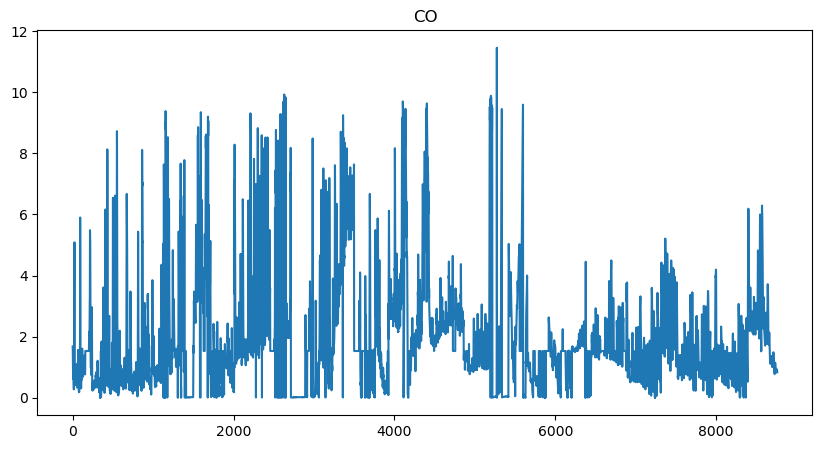

In [175]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
mathura_road['CO (mg/m³)'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='CO')
plt.show()     #on basis of timestamp

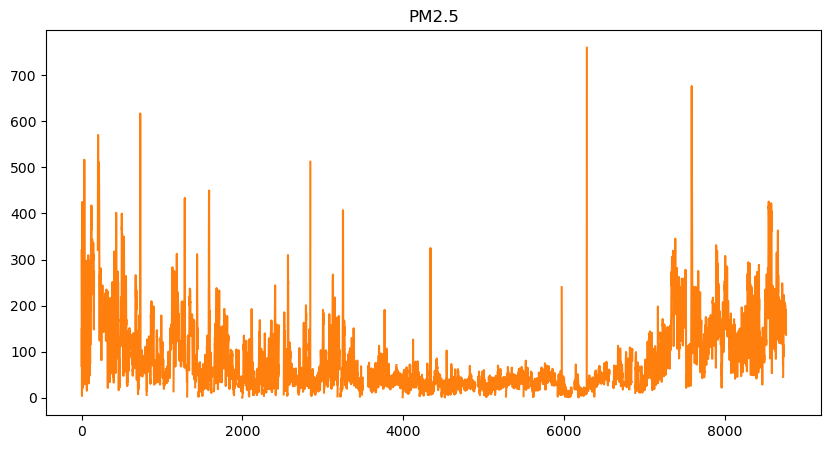

In [176]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
mathura_road['PM2.5 (µg/m³)'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[1],
                     title='PM2.5')
plt.show()     #on basis of timestamp

<h2>test tarin data </h2>

In [ ]:
#checking for first month

In [174]:
split_date='2023-09-30'
pm_train1=mathura_road_2.loc[mathura_road_2.index<=split_date].copy()
#  pm_train1=pd.DataFrame(pm_train['pm2_5'])
#  pm_test=all_data.loc[all_data.index>split_date].copy()
#  pm_test=pd.DataFrame(pm_test['pm2_5'])

In [159]:
pm_test=pd.DataFrame(mathura_road_2[['PM2.5 (µg/m³)']])

In [112]:
pm_train1

,PM2.5 (µg/m³),PM10 (µg/m³),Ozone (µg/m³),NO2 (µg/m³),CO (mg/m³)
Timestamp,,,,,
2023-01-01 00:00:00,320.030000,229.3475,18.2325,26.5150,1.6800
2023-01-01 01:00:00,205.282500,293.7725,18.0725,26.5125,1.5750
2023-01-01 02:00:00,169.927500,253.5325,17.8175,26.5175,1.2675
2023-01-01 03:00:00,67.213333,225.8825,17.6375,26.5700,0.9550
2023-01-01 04:00:00,151.030000,181.4200,17.7575,26.5950,0.8275
...,...,...,...,...,...
2023-09-29 19:00:00,61.705000,143.0300,24.4775,14.8000,1.8300
2023-09-29 20:00:00,77.017500,190.2150,15.4550,13.3975,2.4225
2023-09-29 21:00:00,78.352500,227.2325,14.8125,13.3850,2.7075


In [160]:
pm_train2=mathura_road_2.reset_index().rename(columns={'Timestamp':'ds','PM2.5 (µg/m³)':'y'})
pm_train2.head()

,ds,y,PM10 (µg/m³),Ozone (µg/m³),NO2 (µg/m³),CO (mg/m³)
0,2023-01-01 00:00:00,320.030000,229.3475,18.2325,26.5150,1.6800
1,2023-01-01 01:00:00,205.282500,293.7725,18.0725,26.5125,1.5750
2,2023-01-01 02:00:00,169.927500,253.5325,17.8175,26.5175,1.2675
3,2023-01-01 03:00:00,67.213333,225.8825,17.6375,26.5700,0.9550
4,2023-01-01 04:00:00,151.030000,181.4200,17.7575,26.5950,0.8275


In [161]:
pm_train2.drop(columns=["PM10 (µg/m³)","Ozone (µg/m³)","NO2 (µg/m³)","CO (mg/m³)"],inplace=True)

In [162]:
pm_train2

,ds,y
0,2023-01-01 00:00:00,320.030000
1,2023-01-01 01:00:00,205.282500
2,2023-01-01 02:00:00,169.927500
3,2023-01-01 03:00:00,67.213333
4,2023-01-01 04:00:00,151.030000
...,...,...
8755,2023-12-31 19:00:00,191.067500
8756,2023-12-31 20:00:00,167.437500
8757,2023-12-31 21:00:00,146.115000
8758,2023-12-31 22:00:00,138.255000


In [163]:
m=Prophet()
m.fit(pm_train2)

15:21:42 - cmdstanpy - INFO - Chain [1] start processing
15:21:44 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
pm_test1=mathura_road_2.loc[mathura_road_2.index>split_date].copy()

In [165]:
pm_test1

,PM2.5 (µg/m³),PM10 (µg/m³),Ozone (µg/m³),NO2 (µg/m³),CO (mg/m³)
Timestamp,,,,,
2023-09-30 00:00:00,62.2500,171.3450,15.2900,13.4000,2.2425
2023-09-30 01:00:00,52.5475,153.2225,14.1375,13.3375,1.9175
2023-09-30 02:00:00,49.3500,134.6300,13.4800,13.1600,1.7300
2023-09-30 03:00:00,55.4525,137.4375,13.8950,13.1725,1.6325
2023-09-30 04:00:00,62.0050,157.1700,13.8625,13.3050,1.8125
...,...,...,...,...,...
2023-12-31 19:00:00,191.0675,259.9325,36.1800,19.0250,0.9275
2023-12-31 20:00:00,167.4375,268.4025,34.6200,19.0325,0.9125
2023-12-31 21:00:00,146.1150,216.0600,34.3800,19.0950,0.8800


In [166]:
pm_test1.reset_index(inplace=True)

In [167]:
pm_test1.rename(columns={'Timestamp':'ds','PM2.5 (µg/m³)':'y'},inplace=True)

In [168]:
pm_test1

,ds,y,PM10 (µg/m³),Ozone (µg/m³),NO2 (µg/m³),CO (mg/m³)
0,2023-09-30 00:00:00,62.2500,171.3450,15.2900,13.4000,2.2425
1,2023-09-30 01:00:00,52.5475,153.2225,14.1375,13.3375,1.9175
2,2023-09-30 02:00:00,49.3500,134.6300,13.4800,13.1600,1.7300
3,2023-09-30 03:00:00,55.4525,137.4375,13.8950,13.1725,1.6325
4,2023-09-30 04:00:00,62.0050,157.1700,13.8625,13.3050,1.8125
...,...,...,...,...,...,...
2227,2023-12-31 19:00:00,191.0675,259.9325,36.1800,19.0250,0.9275
2228,2023-12-31 20:00:00,167.4375,268.4025,34.6200,19.0325,0.9125
2229,2023-12-31 21:00:00,146.1150,216.0600,34.3800,19.0950,0.8800
2230,2023-12-31 22:00:00,138.2550,166.4150,33.9500,19.1325,0.8550


In [169]:
pm_test1.drop(columns=["PM10 (µg/m³)","Ozone (µg/m³)","NO2 (µg/m³)","CO (mg/m³)"], inplace=True)

In [170]:
pm_test_fcst=m.predict(pm_test1)

In [171]:
pm_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-30 00:00:00,45.085942,6.618689,134.653649,45.085942,45.085942,24.511580,24.511580,24.511580,23.265853,23.265853,23.265853,1.245727,1.245727,1.245727,0.0,0.0,0.0,69.597522
1,2023-09-30 01:00:00,45.179955,0.595630,132.359136,45.179955,45.179955,21.524144,21.524144,21.524144,20.198030,20.198030,20.198030,1.326114,1.326114,1.326114,0.0,0.0,0.0,66.704099
2,2023-09-30 02:00:00,45.273968,-1.980593,127.748485,45.273968,45.273968,17.477267,17.477267,17.477267,16.062323,16.062323,16.062323,1.414944,1.414944,1.414944,0.0,0.0,0.0,62.751235
3,2023-09-30 03:00:00,45.367981,-7.246222,124.902752,45.367981,45.367981,13.690835,13.690835,13.690835,12.179699,12.179699,12.179699,1.511136,1.511136,1.511136,0.0,0.0,0.0,59.058816
4,2023-09-30 04:00:00,45.461994,-11.079956,120.949052,45.461994,45.461994,11.140619,11.140619,11.140619,9.527099,9.527099,9.527099,1.613520,1.613520,1.613520,0.0,0.0,0.0,56.602613


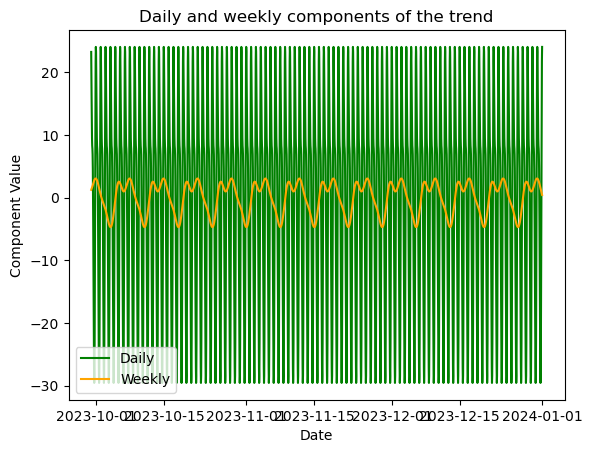

In [139]:
# @title Daily and weekly components of the trend

import matplotlib.pyplot as plt

plt.figure()
plt.plot(pm_test_fcst['ds'], pm_test_fcst['daily'], color='green', label='Daily')
plt.plot(pm_test_fcst['ds'], pm_test_fcst['weekly'], color='orange', label='Weekly')
plt.xlabel('Date')
plt.ylabel('Component Value')
plt.title('Daily and weekly components of the trend')
plt.legend()
plt.show()

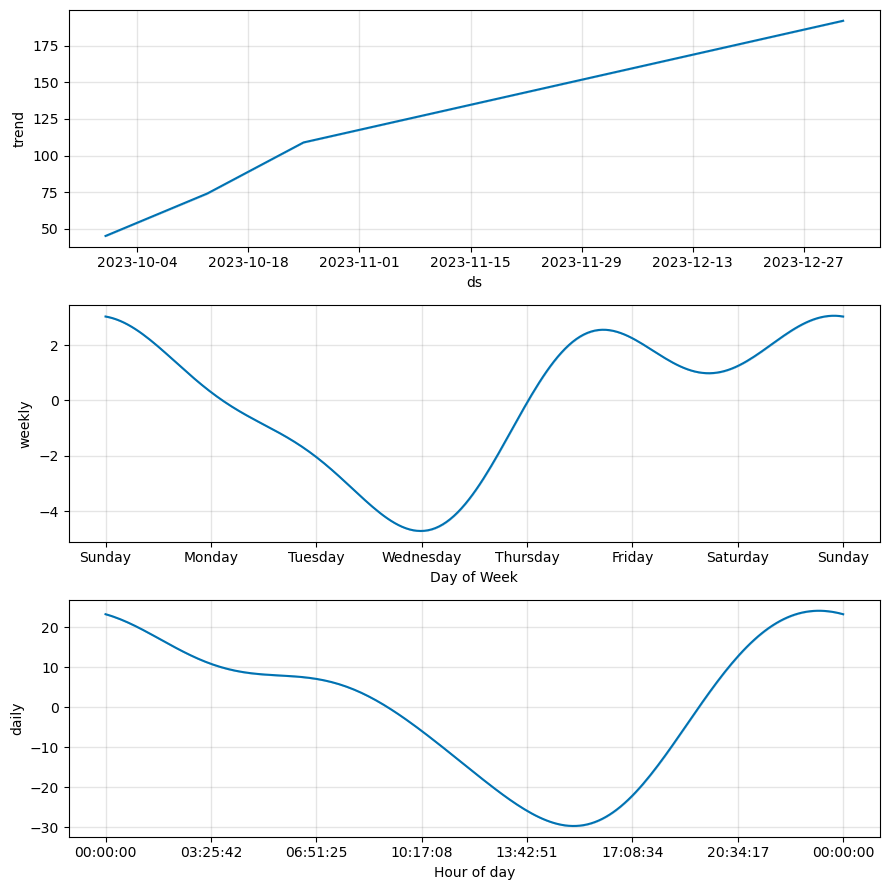

In [140]:
fig= m.plot_components(pm_test_fcst)
plt.show()

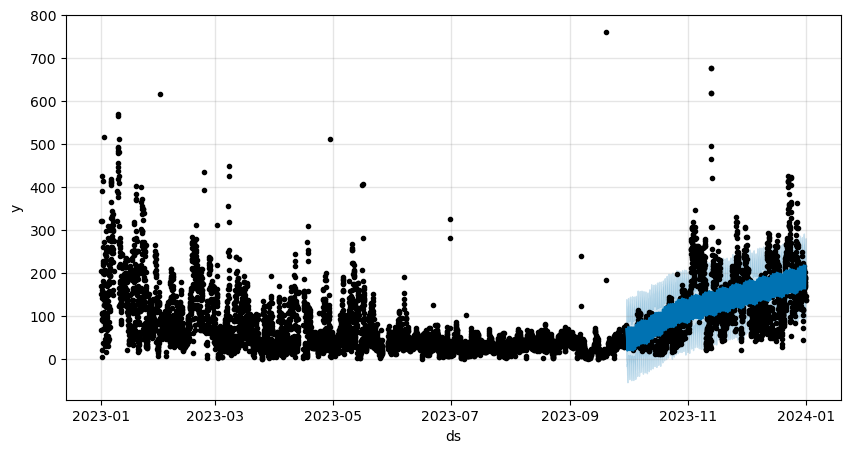

In [141]:
fig,ax= plt.subplots(figsize=(10,5))
fig= m.plot(pm_test_fcst,ax=ax)
plt.show()

TypeError: tz must be string or tzinfo subclass.

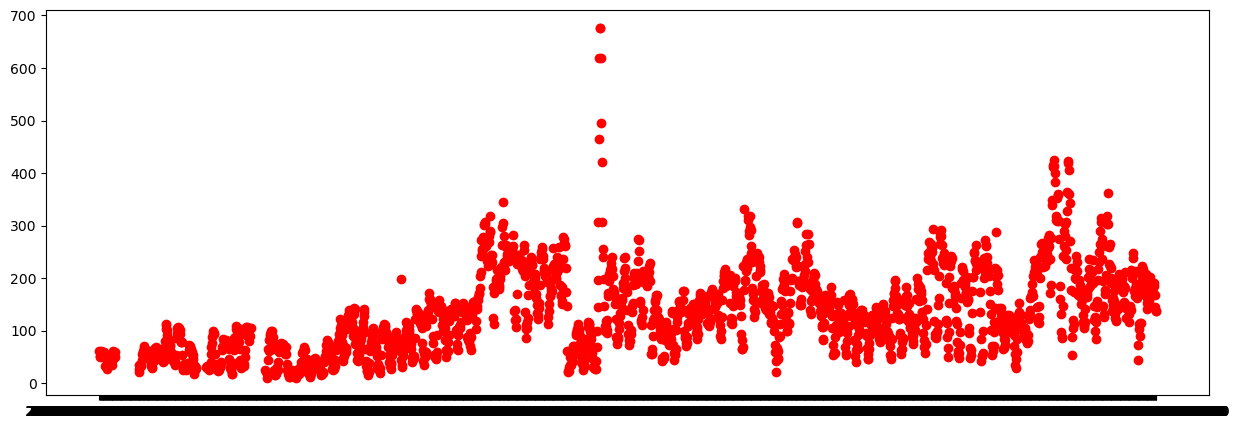

In [143]:
f,ax= plt.subplots(figsize=(15,5))
ax.scatter(pm_test1['ds'], pm_test1['y'],color='r')
fig=m.plot(pm_test_fcst,ax=ax)
ax.set_xbound(lower='2023-01-01',
             upper='2023-01-31')
ax.set_ylim(0,4000)
plot=plt.suptitle('December,2022 Forecast vs Actuals')

In [172]:
future = m.make_future_dataframe(periods=30)
bhavisya=m.predict(future)

In [173]:
bhavisya

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01 00:00:00,214.820618,172.643104,308.348422,214.820618,214.820618,26.297063,26.297063,26.297063,23.265853,23.265853,23.265853,3.031211,3.031211,3.031211,0.0,0.0,0.0,241.117681
1,2023-01-01 01:00:00,214.677563,169.646013,302.895306,214.677563,214.677563,23.196106,23.196106,23.196106,20.198030,20.198030,20.198030,2.998076,2.998076,2.998076,0.0,0.0,0.0,237.873669
2,2023-01-01 02:00:00,214.534508,164.687359,297.327061,214.534508,214.534508,19.014830,19.014830,19.014830,16.062323,16.062323,16.062323,2.952506,2.952506,2.952506,0.0,0.0,0.0,233.549337
3,2023-01-01 03:00:00,214.391453,162.327001,300.701001,214.391453,214.391453,15.074577,15.074577,15.074577,12.179699,12.179699,12.179699,2.894878,2.894878,2.894878,0.0,0.0,0.0,229.466030
4,2023-01-01 04:00:00,214.248398,161.080161,295.151407,214.248398,214.248398,12.352782,12.352782,12.352782,9.527099,9.527099,9.527099,2.825683,2.825683,2.825683,0.0,0.0,0.0,226.601180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,2024-01-26 23:00:00,223.857762,185.136813,320.003200,212.180502,238.244222,25.240386,25.240386,25.240386,24.065628,24.065628,24.065628,1.174758,1.174758,1.174758,0.0,0.0,0.0,249.098149
8184,2024-01-27 23:00:00,225.079922,179.496366,319.300385,212.569675,240.024152,27.117284,27.117284,27.117284,24.065628,24.065628,24.065628,3.051656,3.051656,3.051656,0.0,0.0,0.0,252.197206
8185,2024-01-28 23:00:00,226.302081,185.489771,319.626982,213.100433,241.983310,24.493398,24.493398,24.493398,24.065628,24.065628,24.065628,0.427770,0.427770,0.427770,0.0,0.0,0.0,250.795479
8186,2024-01-29 23:00:00,227.524240,179.675050,321.133719,213.609008,243.717820,22.144936,22.144936,22.144936,24.065628,24.065628,24.065628,-1.920692,-1.920692,-1.920692,0.0,0.0,0.0,249.669176


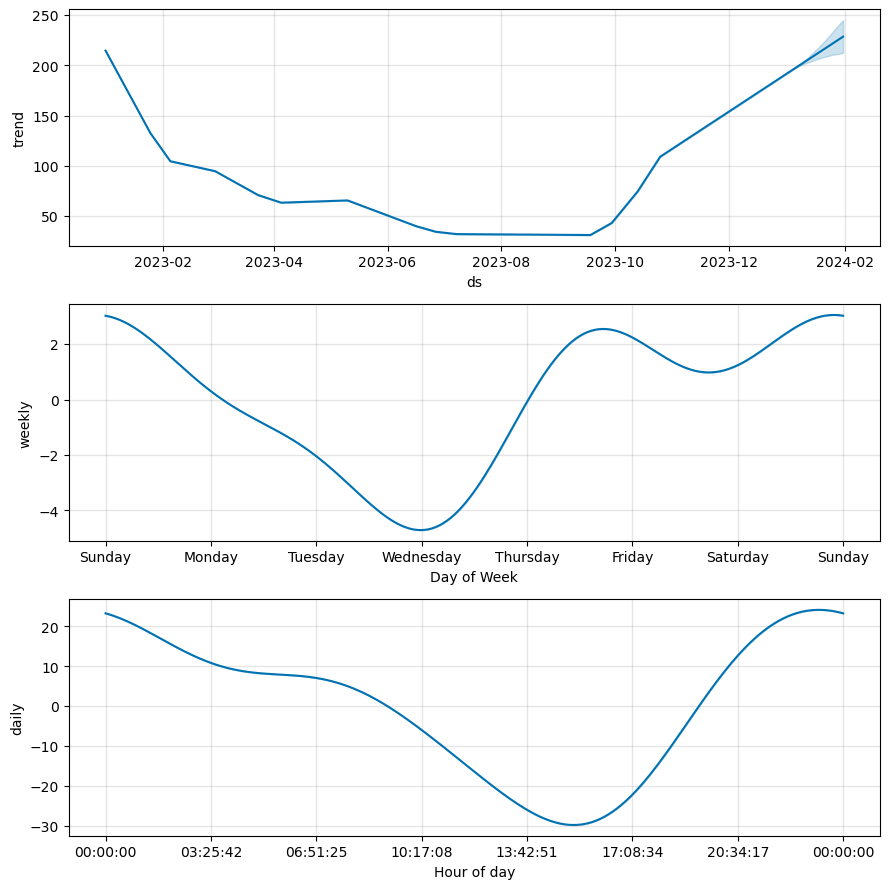

In [146]:
fig= m.plot_components(bhavisya)
plt.show()